In [1]:
# Setup e carregamento dos dados
# Imports essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset limpo
df = pd.read_csv('../data/ifood_data_limpo.csv')

# Verificando as 5 primeiras linhas
df.head()

,availableForScheduling,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags
0,False,marmita,3.99,27,1.22,5300108,10.0,cantina arte & sabor,[],cheapest,0.0,['address_preform_type $$ cart::mcht::100_deli...
1,False,açaí,7.99,61,4.96,5300108,10.0,raruty açaí raiz,[],cheapest,0.0,['address_preform_type $$ guided_help_type $$ ...
2,False,bebidas,11.99,70,8.35,5300108,5.0,toma na kombi,[],moderate,0.0,['address_preform_type $$ cpgn_user_discount_6...
3,False,carnes,16.49,63,6.35,5300108,20.0,churrasquinho do barriga´s,[],cheapest,0.0,['address_preform_type $$ guided_help_type $$ ...
4,False,brasileira,11.99,58,5.22,5300108,20.0,prime restaurante,[],cheapest,0.0,['address_preform_type $$ guided_help_type $$ ...


In [2]:
# Estatísticas descritivas gerais
print(df.describe())

        delivery_fee  delivery_time       distance          ibge  \
count  392879.000000  392879.000000  392879.000000  3.928790e+05   
mean        6.785738      46.495776       3.304103  3.439991e+06   
std         4.249458      15.556741       1.909015  7.515853e+05   
min         0.000000      -1.000000       0.000000  1.100023e+06   
25%         4.000000      35.000000       1.730000  3.140001e+06   
50%         6.000000      45.000000       3.050000  3.516309e+06   
75%         9.490000      60.000000       4.760000  3.550308e+06   
max        30.000000      97.000000       9.410000  5.300108e+06   

       minimumOrderValue         rating  
count      392879.000000  392879.000000  
mean           14.223273       2.509955  
std             7.480974       2.288486  
min             0.000000       0.000000  
25%            10.000000       0.000000  
50%            15.000000       3.925530  
75%            20.000000       4.718750  
max            35.000000       5.000000  


In [3]:
# Contagem das 10 categorias mais comuns
print(df['category'].value_counts().head(10))

category
lanches          96979
brasileira       71824
doces & bolos    38770
pizza            34504
açaí             21849
marmita          16349
bebidas          12618
japonesa         12451
saudável          9535
salgados          9433
Name: count, dtype: int64


In [4]:
# Média do tempo de entrega por categoria (ordenado decrescente)
df.groupby('category')['delivery_time'].mean().sort_values(ascending=False).head(10)

category
panqueca         50.641379
mercado          49.925830
japonesa         49.535298
pizza            49.094569
frangos          48.467140
lanches          48.458831
xis              48.364865
hambúrguer       47.902563
variada          47.772750
frutos do mar    47.622964
Name: delivery_time, dtype: float64

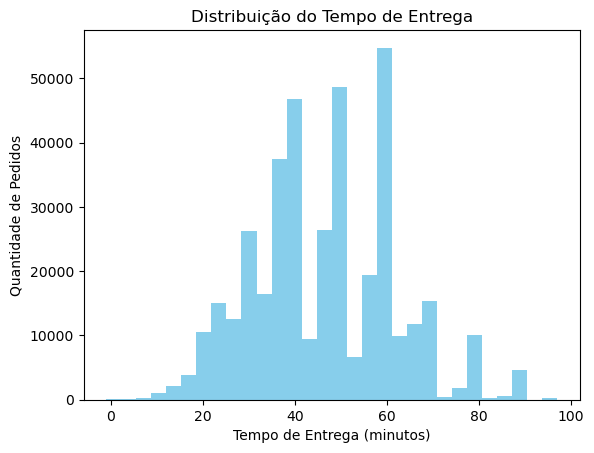

In [5]:
# Histograma do tempo de entrega
plt.hist(df['delivery_time'], bins=30, color='skyblue')
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (minutos)')
plt.ylabel('Quantidade de Pedidos')
plt.show()

category
panqueca         50.641379
mercado          49.925830
japonesa         49.535298
pizza            49.094569
frangos          48.467140
lanches          48.458831
xis              48.364865
hambúrguer       47.902563
variada          47.772750
frutos do mar    47.622964
Name: delivery_time, dtype: float64


C:\Users\leole\AppData\Local\Temp\ipykernel_21652\3112512332.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


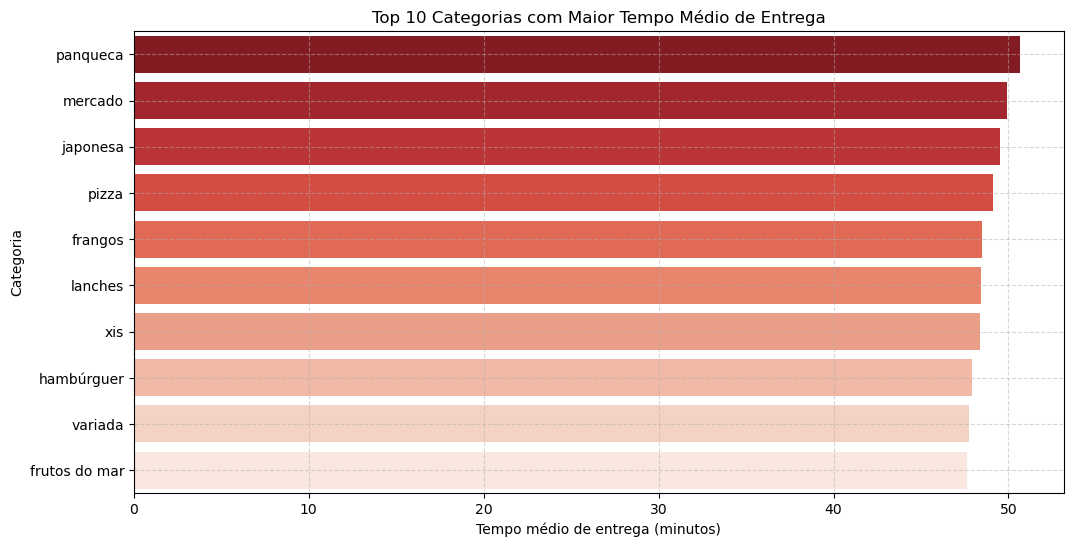

In [6]:
# Agrupar por categoria e calcular a média do tempo de entrega
media_entrega_por_categoria = df.groupby('category')['delivery_time'].mean()

# Ordenar em ordem decrescente para ver quem demora mais
media_entrega_ordenada = media_entrega_por_categoria.sort_values(ascending=False)

# Exibir as 10 categorias que mais demoram
print(media_entrega_ordenada.head(10))

# Plotando o resultado
plt.figure(figsize=(12,6))
sns.barplot(
    x=media_entrega_ordenada.head(10).values,
    y=media_entrega_ordenada.head(10).index,
    palette='Reds_r'
)
plt.title('Top 10 Categorias com Maior Tempo Médio de Entrega')
plt.xlabel('Tempo médio de entrega (minutos)')
plt.ylabel('Categoria')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\leole\AppData\Local\Temp\ipykernel_21652\779324084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='viridis')


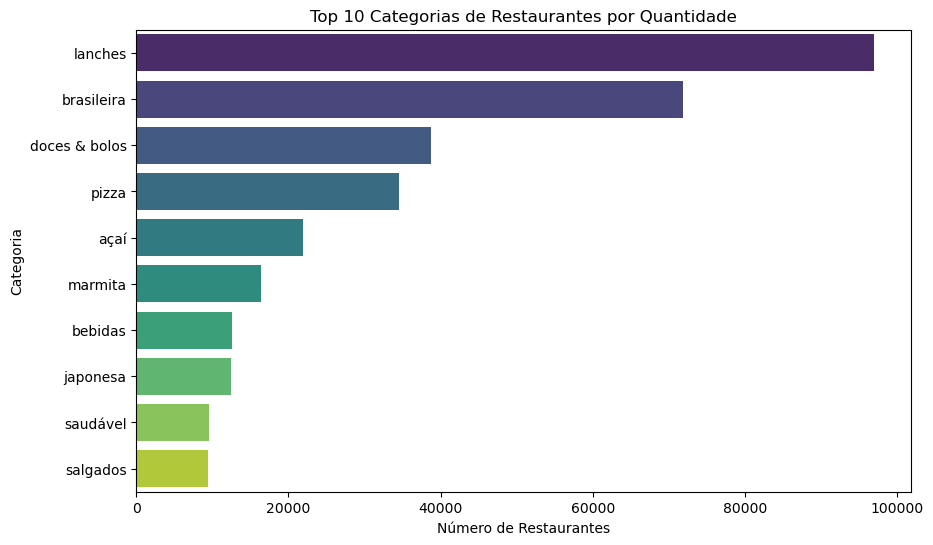

In [7]:
# Contar categorias
top_categorias = df['category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='viridis')
plt.title('Top 10 Categorias de Restaurantes por Quantidade')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Categoria')
plt.show()

In [8]:
# Seleciona apenas as categorias mais populares
top_categorias = ['lanches', 'brasileira', 'doces & bolos']

# Agrupa e calcula métricas
resumo = (
    df[df['category'].isin(top_categorias)]
    .groupby('category')
    .agg({
        'delivery_time': 'mean',
        'delivery_fee': 'mean',
        'rating': 'mean',
        'name': 'count'
    })
    .rename(columns={'name': 'quantidade_estabelecimentos'})
    .sort_values(by='quantidade_estabelecimentos', ascending=False)
)

print(resumo)

               delivery_time  delivery_fee    rating  \
category                                               
lanches            48.458831      6.337658  2.455193   
brasileira         45.866980      6.667453  2.215803   
doces & bolos      44.800000      7.821402  2.199505   

               quantidade_estabelecimentos  
category                                    
lanches                              96979  
brasileira                           71824  
doces & bolos                        38770  


In [10]:
participacao = (
    df['category']
    .value_counts(normalize=True)
    .loc[top_categorias] * 100
).round(2)

print(participacao)

#Insight:
#As categorias lanches, brasileira e doces & bolos representam as mais populares entre os consumidores, concentrando aproximadamente 52,83% dos estabelecimentos.
#Enquanto lanches se destacam pela maior quantidade e tempo médio de entrega mais rápido, doces & bolos tendem a 
#apresentar notas mais baixas e taxas médias ligeiramente mais altas — possivelmente por serem mais nichados.

category
lanches          24.68
brasileira       18.28
doces & bolos     9.87
Name: proportion, dtype: float64


C:\Users\leole\AppData\Local\Temp\ipykernel_21652\627235777.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Categoria', y='Tempo de Entrega (min)', ax=axes[0], palette='Blues_d')
C:\Users\leole\AppData\Local\Temp\ipykernel_21652\627235777.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Categoria', y='Taxa de Entrega (R$)', ax=axes[1], palette='Oranges_d')
C:\Users\leole\AppData\Local\Temp\ipykernel_21652\627235777.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Categoria', y='

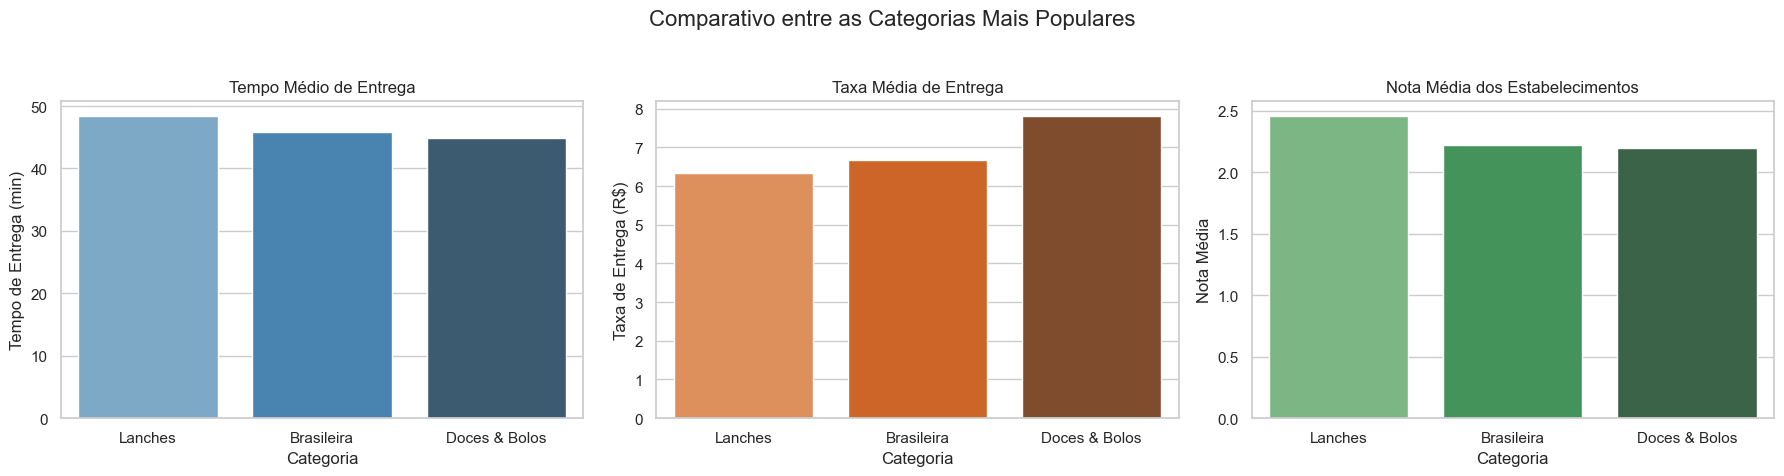

In [11]:
# Dados resumidos
data = {
    'Categoria': ['Lanches', 'Brasileira', 'Doces & Bolos'],
    'Tempo de Entrega (min)': [48.46, 45.87, 44.8],
    'Taxa de Entrega (R$)': [6.34, 6.67, 7.82],
    'Nota Média': [2.46, 2.22, 2.20]
}

df_plot = pd.DataFrame(data)

# Configurações do estilo
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tempo de entrega
sns.barplot(data=df_plot, x='Categoria', y='Tempo de Entrega (min)', ax=axes[0], palette='Blues_d')
axes[0].set_title('Tempo Médio de Entrega')

# Taxa de entrega
sns.barplot(data=df_plot, x='Categoria', y='Taxa de Entrega (R$)', ax=axes[1], palette='Oranges_d')
axes[1].set_title('Taxa Média de Entrega')

# Nota média
sns.barplot(data=df_plot, x='Categoria', y='Nota Média', ax=axes[2], palette='Greens_d')
axes[2].set_title('Nota Média dos Estabelecimentos')

# Mostrar os gráficos
plt.suptitle('Comparativo entre as Categorias Mais Populares', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

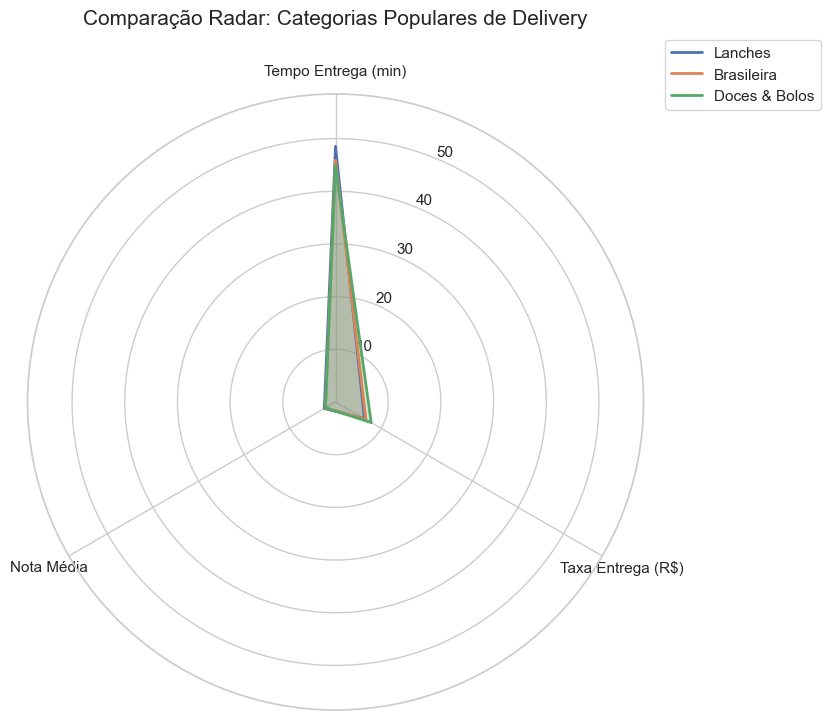

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
labels = ['Tempo Entrega (min)', 'Taxa Entrega (R$)', 'Nota Média']
categories = ['Lanches', 'Brasileira', 'Doces & Bolos']

# Valores para cada categoria na ordem dos labels
values = {
    'Lanches': [48.46, 6.34, 2.46],
    'Brasileira': [45.87, 6.67, 2.22],
    'Doces & Bolos': [44.80, 7.82, 2.20]
}

# Número de variáveis
num_vars = len(labels)

# Ângulos para os eixos do radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o gráfico unindo o último ponto ao primeiro
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for cat in categories:
    vals = values[cat]
    vals += vals[:1]  # fechar o círculo
    ax.plot(angles, vals, label=cat, linewidth=2)
    ax.fill(angles, vals, alpha=0.25)

# Configurações dos eixos
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Limites - ajustando para escala visual (melhorar visualização)
ax.set_ylim(0, max(max(vals) for vals in values.values()) + 10)

# Título e legenda
plt.title('Comparação Radar: Categorias Populares de Delivery', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [13]:
 print(df.columns)

Index(['availableForScheduling', 'category', 'delivery_fee', 'delivery_time',
       'distance', 'ibge', 'minimumOrderValue', 'name', 'paymentCodes',
       'price_range', 'rating', 'tags'],
      dtype='object')
